<a href="https://colab.research.google.com/github/SangMin316/Computer-Vision/blob/main/Basic_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021학년도 2학기 패턴인식 HW2: CNN

HW2에서는 convolutional layer (CONV)와 pooling layer (POOL)의 forward propagation을 numpy로 구현하시오. Exercise 1,2,3,4를 잘 읽고 해당하는 함수를 구현하시오. (총 함수 4개 구현)

**Notation**:
- Superscript $[l]$ denotes an object of the $l^{th}$ layer. 
    - Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.


- Superscript $(i)$ denotes an object from the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example input.
    
    
- Subscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer $l$, assuming this is a fully connected (FC) layer.
    
    
- $n_H$, $n_W$ and $n_C$ denote respectively the height, width and number of channels of a given layer. If you want to reference a specific layer $l$, you can also write $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$. 
- $n_{H_{prev}}$, $n_{W_{prev}}$ and $n_{C_{prev}}$ denote respectively the height, width and number of channels of the previous layer. If referencing a specific layer $l$, this could also be denoted $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$. 



<a name='1'></a>
## 1 - 패키지

아래 셀을 실행시켜 구현에 필요한 패키지들을 import 한다.



In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


<a name='2'></a>
## 2 - 개요

아래 명시된 CNN의 block들을 구현한다.

- Convolution functions, including:
    - Zero Padding
    - Convolve window 
    - Convolution forward

- Pooling functions, including:
    - Pooling forward
    - Create mask 
    - Distribute value

    
이번 과제에서는 위의 함수들을 `numpy`로 구현하시오. TensorFlow를 쓰면 같은 기능을 하는 함수들이 있지만, 이 과제는 numpy로만 구현한다.

<a name='3'></a>
## 3 - Convolutional Neural Networks

라이브러리 등을 활용하여 convolution의 구현이 쉬워지기는 했지만, convolution은 Deep Learning에서 중요하고도 어려운 개념이다. convolution layer는 주어진 input volume을 다른 size의 output volume으로 변환시킨다. 



<a name='3-1'></a>
### 3.1 - Zero-Padding

Zero-padding은 이미지의 가장자리에 0의 픽셀들을 덧붙이는 작업이다.

<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u><font color='purple'>  : <b>Zero-Padding</b><br> Image (3 channels, RGB) with a padding of 2. </center></caption>

Padding의 이점:

- CONV layer를 volume의 축소 없이 사용할 수 있다. 이는 깊은 신경망을 사용할수록 중요해진다. 특별한 케이스가 "same" convolution인데, 하나의 layer를 통과한 이후 height/width가 똑같이 보존되는 경우를 뜻한다.

- 이미지 가장자리의 정보를 좀더 활용할수 있게 해준다. padding이 없다면, 이미지 가장자리의 픽셀들은 다음 layer에 매우 적은 영향력을 행사할 수 밖에 없다.

<a name='ex-1'></a>
### Exercise 1 - zero_pad
아래 zero_pad 함수를 구현하시오. 이 함수는 주어진 dataset X에 포함된 m개의 이미지 모두의 가장자리에 zero를 padding한다. [np.pad 함수를 활용](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html). 예를 들어, array "a" of shape $(5,5,5,5,5)$ 를 2nd dimension에 `pad = 1`로 pad하고, 4th dimension에는 `pad = 3` 로 pad하고, 나머지 dimension에는 `pad = 0`으로 pad하고자 한다면, 다음과 같이 함수를 활용하여 구현 가능하다:
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))
```

In [ ]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)), mode = 'constant', constant_values = (0,0))
    
    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


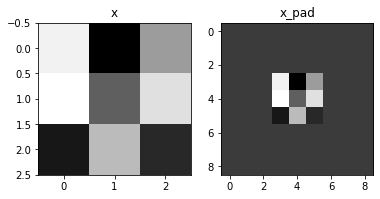

In [ ]:
# Test code
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])


<a name='3-2'></a>
### 3.2 - Single Step of Convolution 

A convolution unit은 다음과 같은 계산을 수행한다. (Figure 2 GIF 참조) 

- Input volume을 받아서,
- Input의 모든 위치에 filter를 적용하여,
- 또다른 크기의 volume을 출력한다.

<caption><center> <u> <font color='purple'> <b>Figure 2</b> </u><font color='purple'>  : <b>Convolution operation</b><br> with a filter of 3x3 and a stride of 1 (stride = amount you move the window each time you slide) </center></caption>



<a name='ex-2'></a>
### Exercise 2 - conv_single_step
이러한 convolution unit을 구축하기 위해, 이 중 한단계의 계산에 해당하는 single step of convolution을 구현하시오. 아래 conv_single_step 함수에서는 input 중 일부를 주어진 filter의 크기만큼만 잘라서 a_slice_prev로 만든 작은 input이 입력 argument로 주어지고, 여기에 같은 크기의 filter W를 element-wise로 곱해준다. 곱한 값들을 모두 더해서 하나의 값 Z로 만들고, 여기에 bias b를 더하여 최종 Z로 반환한다. 따라서 conv_single_step 함수는 a single real-valued 값 Z를 반환한다.
    
[Hint](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html).

In [ ]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    s = np.multiply(a_slice_prev, W)
    Z = np.sum(s)
    Z = Z + float(b)
    return Z

In [ ]:
# Test code
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)
# Expected output: Z=-23.1602

Z = -6.999089450680221


<a name='3-3'></a>
### 3.3 - Convolutional Neural Networks - Forward Pass

Forward pass에서는 여러 개의 filter를 받아서 input과 convolution을 계산한다. 각 filter에 대한 convolution은 2D matrix를 출력한다. 이러한 2D matrix를 쌓아서 3D volume으로 만들어 최종적으로 반환한다. 


<a name='ex-3'></a>
### Exercise 3 -  conv_forward
Filters `W`를 input activation `A_prev`와 convolution하는 함수를 구현하시오. 이 함수는 다음과 같은 값들을 입력 argument로 받는다.

* `A_prev`: 이전 layer에서 출력한 activation (for a batch of m inputs); 
* `W`: Filter weights.  Filter window size는 `f` by `f`.
* `b`: Bias vector. 각 filter마다 bias 값 하나씩.

Hyperparameter인 stride와 padding에도 access 가능.

**Hint**: 
1. "a_prev" (shape (5,5,3)) 의 좌상단 코너 지점 2x2 크기의 slice를 선택하려면:
```python
a_slice_prev = a_prev[0:2,0:2,:]
```
위의 코드는 height 2, width 2, and depth 3의 3D slice를 제공한다. Depth는 채널의 개수이다. 이 코드는 `start/end` index를 활용하여 `a_slice_prev`를 정의하는데 유용할 것이다.

2. `a_slice`를 정의하려면 이 slice의 코너점 네개 `vert_start`, `vert_end`, `horiz_start`, `horiz_end`를 정의해야 한다. 

<caption><center> <u> <font color='purple'> <b>Figure 3</b> </u><font color='purple'>  : <b>Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)</b> <br> This figure shows only a single channel.  </center></caption>


**Reminder**:
    
convolution 계산의 input shape과 output shape 관계에 관한 공식:
    
$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_C = \text{number of filters used in the convolution}$$
    
이번 함수를 계산하는데 있어서 일단 vectorization은 걱정하지 말고, for-loop으로 모두 계산하시오.


#### Additional Hints :


* 아래 변수들에게는 Array slicing 을 활용 (e.g.`varname[0:1,:,3:5]`)  
  `a_prev_pad` ,`W`, `b`  

* `vert_start`, `vert_end`, `horiz_start`, `horiz_end` 들을 구하기 위해서는 이전 layer들의 index들을 활용

* `a_slice_prev` 는 height, width, depth가 있어야 한다.

* `a_prev_pad` 는 `A_prev_pad`의 subset이다.   


In [ ]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    # YOUR CODE STARTS HERE
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape

    # Retrieve information from "hparameters"
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. (≈2 lines)
    n_H = int((n_H_prev - f + (2 * pad)) / stride + 1)
    n_W = int((n_W_prev - f + (2 * pad)) / stride + 1)
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev[i]               # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = stride * h
            vert_end = stride * h + f
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" (≈2 lines)
                horiz_start = stride * w
                horiz_end = stride * w + f
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = A_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end, :]                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈3 line)
                    # weights = None
                    # biases = None
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])

    # YOUR CODE ENDS HERE
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
# Test code
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[0,2,1] =\n", Z[0, 2, 1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

# Expected output:
# Z's mean = 8.197763428003048
# Z[0,2,1] =
# [-51.13640902  10.93358694 -16.67526948  25.91524569  17.48959664
#  61.96334769  15.97168671  21.00441112]
# cache_conv[0][1][2][3] =
# [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


최종적으로, CONV layer는 activation을 포함해야 하므로 아래의 코드가 추가 되어야 하지만, 이 과제에서는 생략한다. 

```python
# Convolve the window to get back one output neuron
Z[i, h, w, c] = ...
# Apply activation
A[i, h, w, c] = activation(Z[i, h, w, c])
```



<a name='4'></a>
## 4 - Pooling Layer 

Pooling layer (POOL)는 input의 height와 width를 줄여준다. 이 단계는 계산량을 줄이고 input의 position에 invariant한 feature detector를 만드는데 도움을 준다. Pooling 방식에는 max-pooling과 average-pooling이 있다.

Pooling layer는 backpropagation을 통해 train해야 할 parameter는 없지만, window size $f$와 filter를 옮기는 간격 stride와 같은 hyperparameter는 존재한다. 


<a name='ex-4'></a>
### Exercise 4 - pool_forward

아래 pool_forward 함수에 MAX-POOL과 AVG-POOL을 하나의 함수에 모두 구현하시오. 

**Reminder**:
Padding은 없으므로, pooling 전후의 input shape과 output shape의 관계는 다음과 같다.

$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f}{stride} \Bigr\rfloor +1$$

$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f}{stride} \Bigr\rfloor +1$$

$$n_C = n_{C_{prev}}$$




In [ ]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    # YOUR CODE STARTS HERE
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = stride * h
            vert_end = stride * h + f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = stride * w
                horiz_end = stride * w + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # YOUR CODE ENDS HERE
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
# Test Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])


mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


**Expected output**

```
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
```

In [ ]:
# Test Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


**Expected Output:**
    
```
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
```

**Congratulations**! CNN을 구성하는 모든 layer의 forward pass 를 구현을 완료하였습니다!
